# Exploring the Chinook database with SQL

In this notebook, you will practice using SQL queries with Pandas to explore the [Chinook database](https://chinookdatabase.codeplex.com/) of music.

## Imports

In [1]:
import numpy as np
import pandas as pd
from pandas.io import sql
from altair import *

In [2]:
from sqlalchemy import create_engine, inspect

Here is a function for howing table information:

In [3]:
def table_info(table_name, i):
    """Shwo the column names and types as a Pandas DataFrame."""
    return pd.DataFrame(i.get_columns(table_name))[['name','type']]

In [4]:
import os
assert os.path.isfile(os.path.join('data', 'Chinook_Sqlite.sqlite'))

## Exploring the database

Create an SqlAlchemy engine for the Chinook database, which is in the file `data/Chinook_Sqlite.sqlite` as save the engine in a variable named `ce`:

In [5]:
ce = create_engine('sqlite:///data/Chinook_Sqlite.sqlite')

In [6]:
import sqlalchemy
assert isinstance(ce, sqlalchemy.engine.base.Engine)

Create an inspector for that engine and save it in a variable named `inspector`:

In [7]:
inspector = inspect(ce)

In [8]:
assert isinstance(inspector, sqlalchemy.engine.reflection.Inspector)

Use the `inspector` and `table_info` to show the column information of the `Genre` table. Save the result in a variable named `t1` and show the table:

In [9]:
ce.table_names()

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

In [10]:
t1 = table_info('Genre', inspector)

In [11]:
assert list(t1.columns)==['name','type']
assert len(t1)==2

Use a SQL `SELECT` statement with `LIMIT` to look at the first 10 rows of the `Genre` table. Save the result in a variable named `t2` and show the table:

In [12]:
#music_df = load_dataset('data/Chinook_Sqlite.sqlite')
#music_df.to_sql('music', ce)

In [13]:
t2 = sql.read_sql_query("""
    SELECT *
    FROM genre
    LIMIT 10;
""", ce)

In [14]:
assert list(t2.columns)==['GenreId', 'Name']
assert len(t2)==10

In [15]:
t2.head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


Use the `inspector` and `table_info` to show the column information of the `Track` table. Save the result in a variable named `t3` and show the table:

In [16]:
t3 = table_info('Track', inspector)

In [17]:
assert list(t3.columns)==['name', 'type']
assert len(t3)==9

Use a SQL `SELECT` statement with `LIMIT` to look at the first 10 rows of the `Track` table. Save the result in a variable named `t4` and show the table:

In [18]:
t4 = sql.read_sql_query("""
    SELECT *
    FROM track
    LIMIT 10;
""", ce)

In [19]:
assert list(t4.columns)==['TrackId','Name','AlbumId','MediaTypeId',
                          'GenreId','Composer','Milliseconds',
                          'Bytes','UnitPrice']
assert len(t4)==10

In [20]:
t4.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [21]:
t4.columns

Index(['TrackId', 'Name', 'AlbumId', 'MediaTypeId', 'GenreId', 'Composer',
       'Milliseconds', 'Bytes', 'UnitPrice'],
      dtype='object')

Use the `inspector` and `table_info` to show the column information of the `MediaType` table. Save the result in a variable named `t5` and show the table:

In [22]:
t5 = table_info('MediaType', inspector)

In [23]:
assert list(t5.columns)==['name', 'type']
assert len(t5)==2

Use a SQL `SELECT` statement with `LIMIT` to look at the first 10 rows of the `MediaType` table. Save the result in a variable named `t6` and show the table:

In [24]:
t6 = sql.read_sql_query("""
    SELECT *
    FROM mediatype
    LIMIT 10;
""", ce)

In [25]:
assert list(t6.columns)==['MediaTypeId', 'Name']
assert len(t6)==5

Write an SQL query to select the `Name`, `Composer` and `UnitPrice` columns from the `Track` table for the rows where the `UnitPrice` is greater than `0.99`. Save the result in a variable named `t7` and show the table:

In [26]:
t7 = sql.read_sql_query("""
    SELECT name, composer, unitPrice
    FROM track
    WHERE unitPrice > 0.99
""", ce)

In [27]:
assert list(t7.columns)==['Name', 'Composer', 'UnitPrice']
assert len(t7)==213

In [28]:
t7.head()

,Name,Composer,UnitPrice
0,Battlestar Galactica: The Story So Far,None,1.99
1,Occupation / Precipice,None,1.99
2,"Exodus, Pt. 1",None,1.99
3,"Exodus, Pt. 2",None,1.99
4,Collaborators,None,1.99


Join the `Track` and `Genre` tables on the `GenreId` columns and compute the average track length in seconds grouped by `Genre.Name`. Sort the results by the track length (`Track.Milliseconds`). Save the result in a variable named `j1` and show the table:

In [29]:
j1 = sql.read_sql_query("""
    SELECT Genre.name, AVG(Track.milliseconds) AS Duration
    FROM Track
    INNER JOIN Genre
    ON Track.genreID = Genre.genreID
    GROUP BY Genre.name
    ORDER BY Duration
""", ce)

In [30]:
j1.head()

,Name,Duration
0,Rock And Roll,134643.500000
1,Opera,174813.000000
2,Hip Hop/Rap,178176.285714
3,Easy Listening,189164.208333
4,Bossa Nova,219590.000000


In [31]:
assert list(j1.columns)==['Name', 'Duration']
assert len(j1)==25

Create an Altair bar chart showing the average track duration for each genre, sorted by duraction.

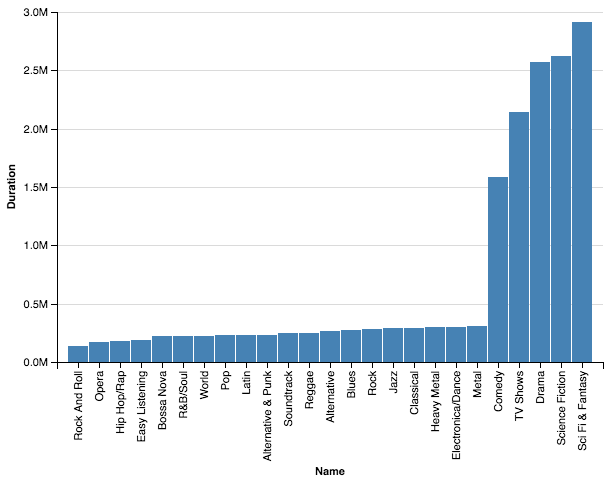

In [32]:
Chart(j1).mark_bar().encode(
    X('Name', sort=SortField(field='Duration', order='ascending')),
    Y('Duration')
)

Join the `MediaType` and `Track` tables and count how many tracks are released with a given media format. Order by the count of the media type. Save the result in a variable named `j2` and show the table:

In [33]:
ce.table_names()

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

In [34]:
table_info('MediaType', inspector)

,name,type
0,MediaTypeId,INTEGER
1,Name,NVARCHAR(120)


In [35]:
j2 = sql.read_sql_query("""
    SELECT MediaType.name, COUNT(MediaType.name) AS Count
    FROM MediaType
    INNER JOIN Track
    ON Track.mediaTypeID = MediaType.mediaTypeID
    GROUP BY MediaType.name
    ORDER BY Count
""", ce)

In [36]:
assert list(j2.columns)==['Name', 'Count']
assert len(j2)==5

In [37]:
j2.head()

,Name,Count
0,Purchased AAC audio file,7
1,AAC audio file,11
2,Protected MPEG-4 video file,214
3,Protected AAC audio file,237
4,MPEG audio file,3034


Make a bar plot of the media type counts:

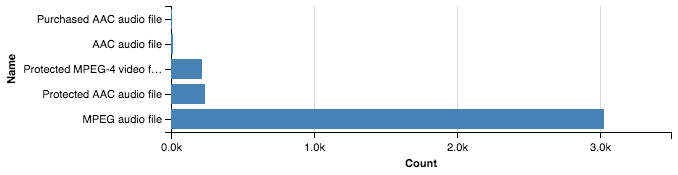

In [38]:
Chart(j2).mark_bar().encode(
    Y('Name', sort=SortField(field='Count', order='ascending')), 
    X('Count')
)